
------------ DATA EXAMPLE ------------
   Desplazamiento Bala  Velocidad Bala  Estatus Salto
0                  650             639              0
1                  650             639              0
2                  629             639              0
3                  608             639              0
4                  587             639              0

------------ TYPES OF PARAMS ------------
Desplazamiento Bala    int64
Velocidad Bala         int64
Estatus Salto          int64
dtype: object

------------ STATISTICS ------------
       Desplazamiento Bala  Velocidad Bala  Estatus Salto
count          1626.000000     1626.000000    1626.000000
mean            311.324108      520.961255       0.472940
std             204.977411      151.454476       0.499421
min               0.000000      329.000000       0.000000
25%             121.000000      377.000000       0.000000
50%             306.000000      466.000000       0.000000
75%             491.000000      645.000000      

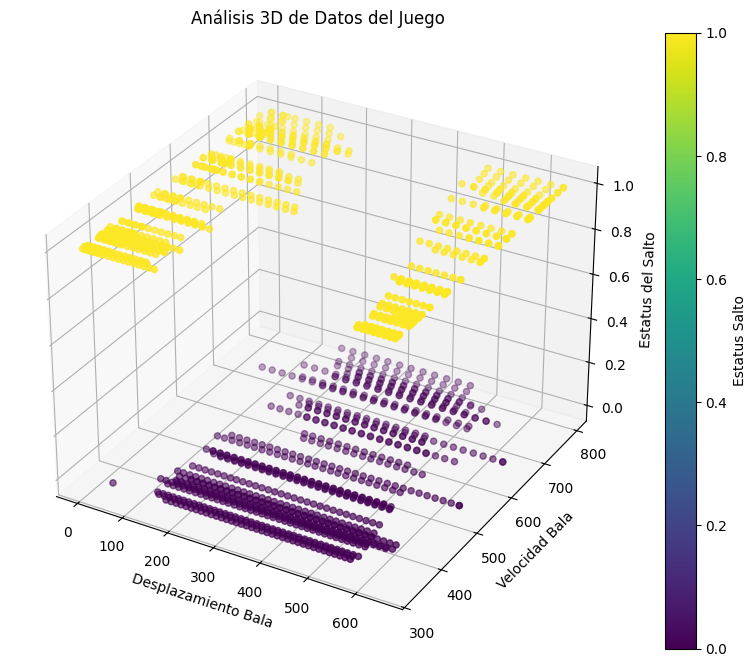

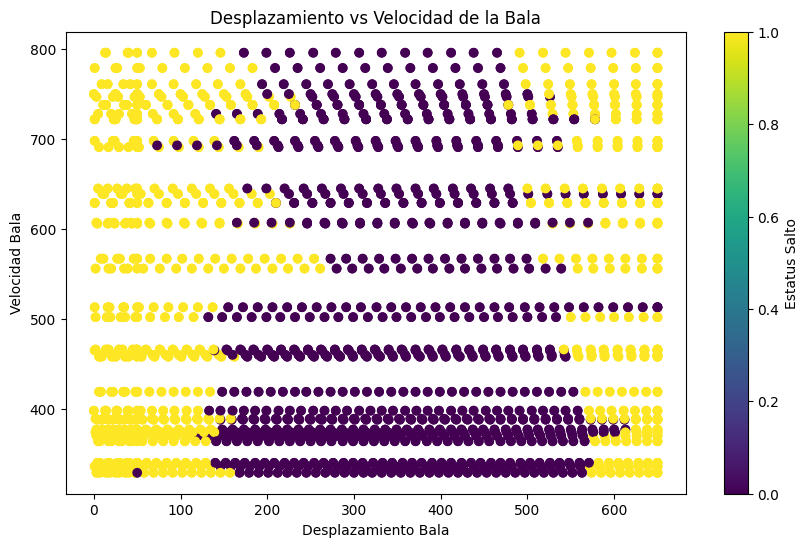

interactive(children=(IntSlider(value=0, description='elev', max=90, min=-90, step=5), IntSlider(value=0, desc…

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed

# Load and read the CSV file

#csv_file_name = 'DATASET1-ME-DEJO-PERDER-AL-INICIO'
#csv_file_name = 'DATASET2-JUEGO-IRREGULAR-5SEG'
#csv_file_name = 'DATASET3-JUEGO-REGULAR-25SEG'
# csv_file_name = 'DATASET4-JUEGO-IRREGULAR-SALTOS-DOBLES-25SEG'
csv_file_name = 'DATASET5-JUGO-REGULAR-50SEG'

csv_path = 'C:/git/IAClass/09_dataset_from_phaser_gage/datasets/' + csv_file_name + '.csv'
df = pd.read_csv(csv_path)


# Verify if the columns don't contain text. If so, convert them to numeric or replace them with NaN
df['Desplazamiento Bala'] = pd.to_numeric(df['Desplazamiento Bala'], errors='coerce')
df['Velocidad Bala'] = pd.to_numeric(df['Velocidad Bala'], errors='coerce')
df['Estatus Salto'] = pd.to_numeric(df['Estatus Salto'], errors='coerce')


# Replace negative values with his absolute value. Before this, we delete NaN values
df = df.dropna()
df['Desplazamiento Bala'] = df['Desplazamiento Bala'].abs()
df['Velocidad Bala'] = df['Velocidad Bala'].abs()

# Stadistics of the data
print("\n------------ DATA EXAMPLE ------------")
print(df.head())
print("\n------------ TYPES OF PARAMS ------------")
print(df.dtypes)
print("\n------------ STATISTICS ------------")
print(df.describe())
print("\n------------ CORRELATIONS ------------")
print(df.corr())

# Create 3d chart and and 3d grid. Then, graph the data, additional labels and finally a colorbar
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Desplazamiento Bala'], 
                     df['Velocidad Bala'], 
                     df['Estatus Salto'],
                     c=df['Estatus Salto'], 
                     cmap='viridis')

ax.set_xlabel('Desplazamiento Bala')
ax.set_ylabel('Velocidad Bala')
ax.set_zlabel('Estatus del Salto')
ax.set_title('Análisis 3D de Datos del Juego')

plt.colorbar(scatter, label='Estatus Salto')
plt.show()

# 2D grafic scatter.
plt.figure(figsize=(10, 6))
plt.scatter(df['Desplazamiento Bala'], df['Velocidad Bala'], c=df['Estatus Salto'], cmap='viridis')
plt.scatter(df['Desplazamiento Bala'], df['Velocidad Bala'], c=df['Estatus Salto'], cmap='viridis')
plt.xlabel('Desplazamiento Bala')
plt.ylabel('Velocidad Bala')
plt.title('Desplazamiento vs Velocidad de la Bala')
plt.colorbar(label='Estatus Salto')
plt.show()


##------------------------- INTERACTIVE -------------------------------
def plot_3d(elev, azim):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(df['Desplazamiento Bala'], 
                         df['Velocidad Bala'], 
                         df['Estatus Salto'],
                         c=df['Estatus Salto'], 
                         cmap='viridis')
    
    ax.set_xlabel('Desplazamiento Bala')
    ax.set_ylabel('Velocidad Bala')
    ax.set_zlabel('Estatus del Salto')
    ax.set_title('Análisis 3D de Datos del Juego')
    
    ax.view_init(elev=elev, azim=azim)
    plt.colorbar(scatter, label='Estatus Salto')
    plt.show()
    
# Crear controles interactivos
interactive_plot = interactive(plot_3d, 
                               elev=(-90, 90, 5), 
                               azim=(-180, 180, 5))
display(interactive_plot)
